In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Путь к папке с изображениями Seizure
seizure_dir = '/content/drive/MyDrive/edf_process/CNN_NN_learning/wavelet_img/Seizure'

# Получаем список всех файлов в папке
wavelet_files = [f for f in os.listdir(seizure_dir) if f.endswith('.png')]

# Выводим количество файлов
num_wavelets = len(wavelet_files)
print(f"Количество сохранённых изображений вейвлетов с эпилепсией: {num_wavelets}")

Количество сохранённых изображений вейвлетов с эпилепсией: 66


In [ ]:
# Путь к папке с изображениями Seizure
seizure_dir = '/content/drive/MyDrive/edf_process/CNN_NN_learning/wavelet_img/Healthy'

# Получаем список всех файлов в папке
wavelet_files = [f for f in os.listdir(seizure_dir) if f.endswith('.png')]

# Выводим количество файлов
num_wavelets = len(wavelet_files)
print(f"Количество сохранённых изображений вейвлетов с эпилепсией: {num_wavelets}")

Количество сохранённых изображений вейвлетов с эпилепсией: 76


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, Reshape, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight, shuffle
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [ ]:
# Функция для загрузки изображений
def load_images(image_dir, target_size):
    images = []
    labels = []
    for class_dir in ['Healthy', 'Seizure']:  # Подкаталоги классов
        class_path = os.path.join(image_dir, class_dir)
        label = 0 if class_dir == 'Healthy' else 1  # Классы кодируются как 0 или 1
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = plt.imread(img_path)
            # plt.figure()
            # plt.imshow(img)
            img = tf.image.resize(img, target_size)  # Изменение размеров изображения
            images.append(img)
            labels.append(label)
    plt.show()
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [ ]:
# Функция для вывода изображений с метками
def display_samples(X, y, num_samples, dataset_name="Dataset"):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i,:,:,:])
        plt.title(f"Label: {np.argmax(y[i])}")
        plt.axis('off')
    plt.suptitle(f"Sample images from {dataset_name}")
    plt.show()

In [ ]:
# Путь к директории с изображениями
image_dir = '/content/drive/MyDrive/edf_process/CNN_NN_learning/wavelet_img/'
os.chdir(image_dir)


# Загрузка данных
#X, y = load_images(image_dir, (700,700))
X, y = load_images(image_dir, (512,512))
# print(X[1,32,32,:])
# Масштабирование изображений (нормализация)
# X = X / 255.0
X, y = shuffle(X, y, random_state=24)
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(142, 512, 512, 4)

In [ ]:
# Преобразование меток в категориальный формат (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
print(y_train)
print(y_test)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 

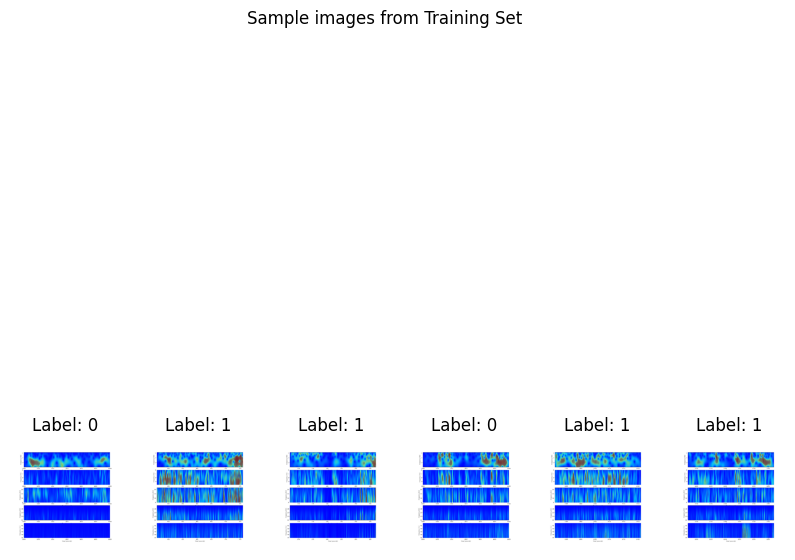

In [ ]:
display_samples(X_train, y_train, num_samples=6, dataset_name="Training Set")

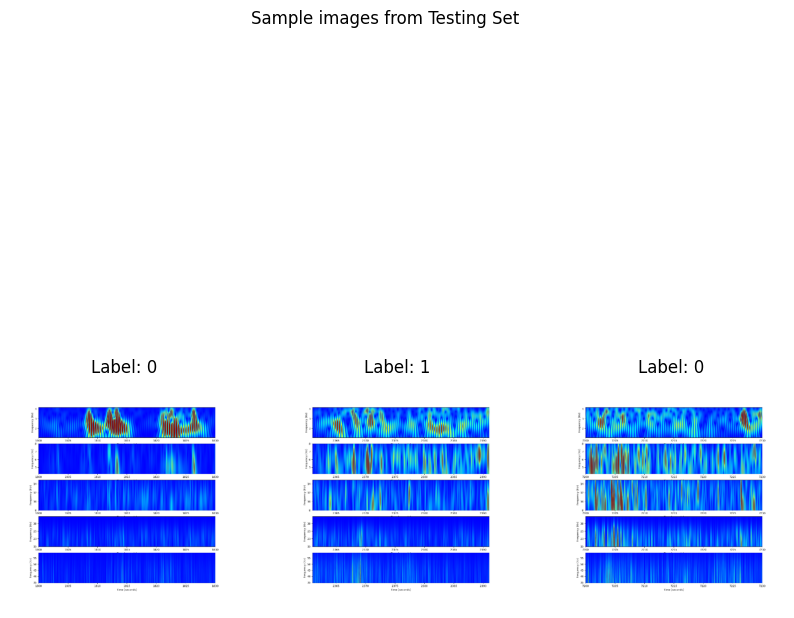

In [ ]:
display_samples(X_test, y_test, num_samples=3, dataset_name="Testing Set")

In [ ]:
# Создание модели CNN-LSTM
def create_cnn_lstm_model(input_shape):
    model = Sequential()
    # Cверточные слои
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    # model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    # model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))


    # Преобразование для LSTM
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.05)))  # Регуляризация L2
    # model.add(Dropout(0.5))
    model.add(Reshape((1, -1)))  # Преобразуем в последовательность длины 1 для LSTM
    model.add(LSTM(64, return_sequences=False))  # Первый LSTM слой
    # model.add(Dropout(0.3))

    # Полносвязный слой
    model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.05)))
    # model.add(Dropout(0.5))

    # Выходной слой для двух классов
    model.add(Dense(2, activation='sigmoid'))  # Для классификации на 2 класса

    # Компиляция модели
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Инициализация модели
input_shape = (512, 512, 4)  # Изображения 64x64 с 3 каналами (RGB)
model = create_cnn_lstm_model(input_shape)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 512, 512, 32)   │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512, 512, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    33,554,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,683,330 (128.49 MB)

 Trainable params: 33,683,266 (128.49 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
# Обучение модели

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=40, restore_best_weights=True)
# Преобразование меток обратно из one-hot encoding в одномерный массив меток

y_train_classes = np.argmax(y_train, axis=1)

# Вычисление весов классов
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_classes), y=y_train_classes)

# Преобразование class_weights в словарь, так как model.fit ожидает словарь
class_weights_dict = dict(enumerate(class_weights))
checkpoint = ModelCheckpoint(
    "best_weights.keras",  # Имя файла для сохранения весов
    monitor="val_accuracy",  # Метрика для отслеживания
    save_best_only=True,     # Сохранять только если улучшилась метрика
    mode="max",              # "max" для максимизации метрики
    verbose=1
)
# Обучение модели с указанием весов классов
history = model.fit(X_train, y_train, epochs=80, batch_size=16, validation_split=0.2, class_weight=class_weights_dict, callbacks=[early_stopping] )
# Оценка модели на тестовых данных
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Печать результатов оценки
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))
print("Accuracy:", accuracy_score(y_true, y_pred_classes))

Epoch 1/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 111s 15s/step - accuracy: 0.5051 - loss: 10.0240 - val_accuracy: 0.5217 - val_loss: 13.0587
Epoch 2/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 135s 16s/step - accuracy: 0.5683 - loss: 12.9035 - val_accuracy: 0.4783 - val_loss: 11.1749
Epoch 3/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 138s 15s/step - accuracy: 0.4729 - loss: 10.4066 - val_accuracy: 0.5217 - val_loss: 7.8739
Epoch 4/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 140s 15s/step - accuracy: 0.5323 - loss: 7.2631 - val_accuracy: 0.5217 - val_loss: 5.5234
Epoch 5/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 159s 18s/step - accuracy: 0.5765 - loss: 5.2599 - val_accuracy: 0.5217 - val_loss: 4.9058
Epoch 6/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 124s 15s/step - accuracy: 0.5868 - loss: 4.8405 - val_accuracy: 0.4783 - val_loss: 4.3831
Epoch 7/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 142s 15s/step - accuracy: 0.5402 - loss: 4.2726 - val_accuracy: 0.5217 - val_loss: 4.2108
Epoch 8/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 89s 15s/step - accuracy: 0.6070 - loss: 4.1302 - val_accuracy: 0.5217 - val_l

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


X_train shape: (113, 512, 512, 4)
X_test shape: (29, 512, 512, 4)
Training samples: 113
Test samples: 29
Epoch 1/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27s/step - accuracy: 0.5045 - loss: 1.6473 
Epoch 1: val_accuracy improved from -inf to 0.52174, saving model to best_weights.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 99s 31s/step - accuracy: 0.4951 - loss: 1.5821 - val_accuracy: 0.5217 - val_loss: 0.8319 - learning_rate: 0.0010
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.4993 - loss: 0.8613 
Epoch 2: val_accuracy did not improve from 0.52174
3/3 ━━━━━━━━━━━━━━━━━━━━ 139s 29s/step - accuracy: 0.4911 - loss: 0.8710 - val_accuracy: 0.4783 - val_loss: 1.0206 - learning_rate: 0.0010
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.4472 - loss: 1.0054 
Epoch 3: val_accuracy did not improve from 0.52174
3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 31s/step - accuracy: 0.4521 - loss: 1.0027 - val_accuracy: 0.4783 - val_loss: 0.8891 - learning_rate: 0.0010
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.45      1.00      0.62        13
           1       0.00      0.00      0.00        16

    accuracy                           0.45        29
   macro avg       0.22      0.50      0.31        29
weighted avg       0.20      0.45      0.28        29

Accuracy: 0.4482758620689655


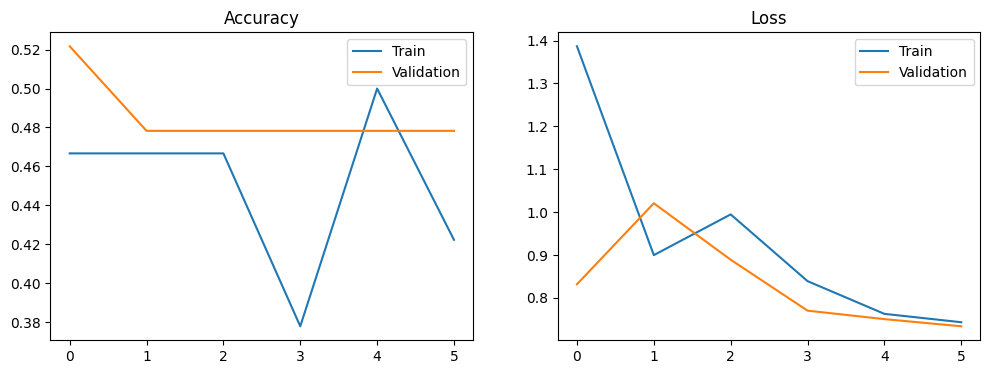

In [ ]:
# Нормализация
X_train = X_train / 255.0
X_test = X_test / 255.0

# Проверка размеров
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

# Настройка callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_weights.keras", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 4), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    Dropout(0.25),
    Dense(2, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2, class_weight=class_weights_dict, callbacks=[early_stopping, checkpoint, reduce_lr])

# Оценка
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print("Classification Report:\n", classification_report(y_true, y_pred_classes))
print("Accuracy:", accuracy_score(y_true, y_pred_classes))

# Визуализация
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()